In [185]:
def return_score_dict_tracker(path):   
    with open(str(path),"r") as f:
        txt=f.read()
    total_tracker={}
    F1_penalty_tracker={}
    F2_penalty_tracker={}
    for l in range(1,101):
        total_tracker[l]=[]
        F1_penalty_tracker[l]=0
        F2_penalty_tracker[l]=0
    txt_line=txt.split("\n")
    for i in range(len(txt_line)):
        txt_line[i]=txt_line[i].strip()
    score_dict_tracker={}
    cur_counter=1
    best_sol=[]
#     itr_counter=0
    best_sol_tracker={}
    for i in range(len(txt_line)):
        if txt_line[i].startswith("%%%"):
            score_dict_tracker[int(txt_line[i].split("=")[-1].strip())]=[]
            F1_penalty_tracker[cur_counter]/=30
            F2_penalty_tracker[cur_counter]/=30
            cur_counter=int(txt_line[i].split("=")[-1].strip())
#             itr_counter=0
        if txt_line[i].startswith("BEST SOLUTION FOUND IN THIS GENERATION"):
            cur_obj=float(txt_line[i].split("BEST SOLUTION FOUND IN THIS GENERATION")[1].split(",")[0][1:].strip())
            temp_list=txt_line[i].split("BEST SOLUTION FOUND IN THIS GENERATION")[1].split("[")
            c_list=[]
            for j in range(3,len(temp_list)-1):
                coord=temp_list[j].split("],")[0].strip().split(",")
                x=int(float(coord[0].strip()))
                y=int(float(coord[1].strip()))
                l=[x,y]
                c_list.append(l)
            last_coord=temp_list[-1].split("]]")[0].split(",")
            x=int(float(last_coord[0].strip()))
            y=int(float(last_coord[1].strip()))
            l=[x,y]
            c_list.append(l)
            score_dict_tracker[cur_counter]=[cur_obj,c_list]
        if txt_line[i].startswith("BEST SOLUTION FOUND UPTIL NOW"):
            cur_obj=float(txt_line[i].split("BEST SOLUTION FOUND UPTIL NOW")[1].split(",")[0][1:].strip())
            temp_list=txt_line[i].split("BEST SOLUTION FOUND UPTIL NOW")[1].split("[")
            c_list=[]
            for j in range(3,len(temp_list)-1):
                coord=temp_list[j].split("],")[0].strip().split(",")
                x=int(float(coord[0].strip()))
                y=int(float(coord[1].strip()))
                l=[x,y]
                c_list.append(l)
            last_coord=temp_list[-1].split("]]")[0].split(",")
            x=int(float(last_coord[0].strip()))
            y=int(float(last_coord[1].strip()))
            l=[x,y]
            c_list.append(l)
            best_sol=[cur_obj,c_list,int(temp_list[-1].split("]]")[1].split("]")[0].split(",")[1].strip())]
        if txt_line[i].startswith("F1 OTHER COSTS"):
#             print(itr_counter)
#             itr_counter+=1
            F1_penalty_tracker[cur_counter]+=float(txt_line[i].split("=")[1].strip())
        if txt_line[i].startswith("F2 OTHER COSTS"):
            F2_penalty_tracker[cur_counter]+=float(txt_line[i].split("=")[1].strip())
        if txt_line[i].startswith(" PARENT POPULATION") or txt_line[i].startswith("PARENT POPULATION 1") or txt_line[i].startswith("CHILD POPULATION") or txt_line[i].startswith("NEW POPULATION"):
            f1_penalty=float(txt_line[i+1].split("=")[-1])
            f2_penalty=float(txt_line[i+2].split("=")[-1])
            f1=float(txt_line[i+4].split(" ")[-1])
            f2=float(txt_line[i+5].split(" ")[-1])
            fin_obj=float(txt_line[i+6].split(" ")[-1])
            total_tracker[int(txt_line[i].split(" ")[-1])].append([f1_penalty,f2_penalty,f1,f2,fin_obj])
    time_needed=float(txt_line[-2].split(" ")[-1].strip())
    gen_found=int(txt_line[-3].split(",")[-1].split("]")[0].strip())
    del F1_penalty_tracker[list(F1_penalty_tracker.keys())[-1]]
    del F2_penalty_tracker[list(F2_penalty_tracker.keys())[-1]]
    return [score_dict_tracker,best_sol,time_needed,F1_penalty_tracker, F2_penalty_tracker,gen_found,total_tracker]
def plotter(d,xlabel,ylabel,image_name,nc=-1):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    plt.plot(list(d.keys()),list(d.values()),color='orange',label=str(nc))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if nc!=-1:
        plt.legend()
    plt.savefig(r"C:\Users\HARIHARAN SUBRAMANIA\Desktop\Dominating Sets for Electric Vehicle Charging Station Placement\NewTrack\New track\Graph Plots Images"+"\\"+str(image_name)+".jpg",bbox_inches="tight")
def voronoi_diagram_drawer(coord_set,nc):
    from scipy.spatial import Voronoi, voronoi_plot_2d
    import numpy as np
    points = np.array(coord_set)
    vor = Voronoi(points)
    fig = plt.figure()
    fig = voronoi_plot_2d(vor)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.title("Optimal Charging Station Placement for NC="+str(nc))
    plt.savefig(r"C:\Users\HARIHARAN SUBRAMANIA\Desktop\Dominating Sets for Electric Vehicle Charging Station Placement\NewTrack\New track\Graph Plots Images"+"\\"+"OPTIMAL VORONOI DIAGRAM "+str(nc)+".jpg",bbox_inches="tight")


In [186]:
overall_GA_dict={}
for nc in [30,40,50,60,70,80,90,100,200]:
    overall_GA_dict[nc]=return_score_dict_tracker(r"C:\Users\HARIHARAN SUBRAMANIA\Desktop\Dominating Sets for Electric Vehicle Charging Station Placement\NewTrack\New track"+ "\\" +str(nc)+" UPDATED GA EV LOG.txt")

obj_progressor={}
F1_progressor={}
F2_progressor={}
F1_penalty_progressor={}
F2_penalty_progressor={}
time_progressor={}
gen_progressor={}
cs_coord={}
for keys,values in overall_GA_dict.items():
    nc=keys
    gen_found=values[5]
    cur_obj=values[1][0]
    time_needed_to_solve=values[2]
    for elements in values[6][gen_found]:
        #print(elements[4],cur_obj)
        if elements[4]==cur_obj:
            obj_progressor[nc]=cur_obj
            F1_progressor[nc]=elements[2]
            F2_progressor[nc]=elements[3]
            F1_penalty_progressor[nc]=elements[1]
            F2_penalty_progressor[nc]=elements[2]
            time_progressor[nc]=time_needed_to_solve
            gen_progressor[nc]=gen_found
    cs_coord[nc]=values[1][1]
            

C:\Users\HARIHARAN SUBRAMANIA\AppData\Local\Temp\ipykernel_26340\3852965253.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,5))


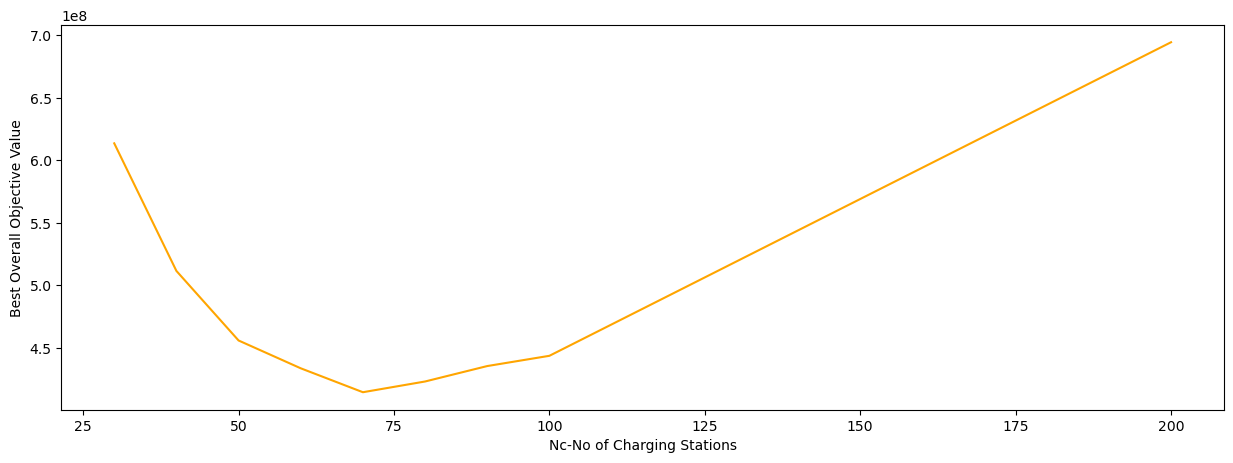

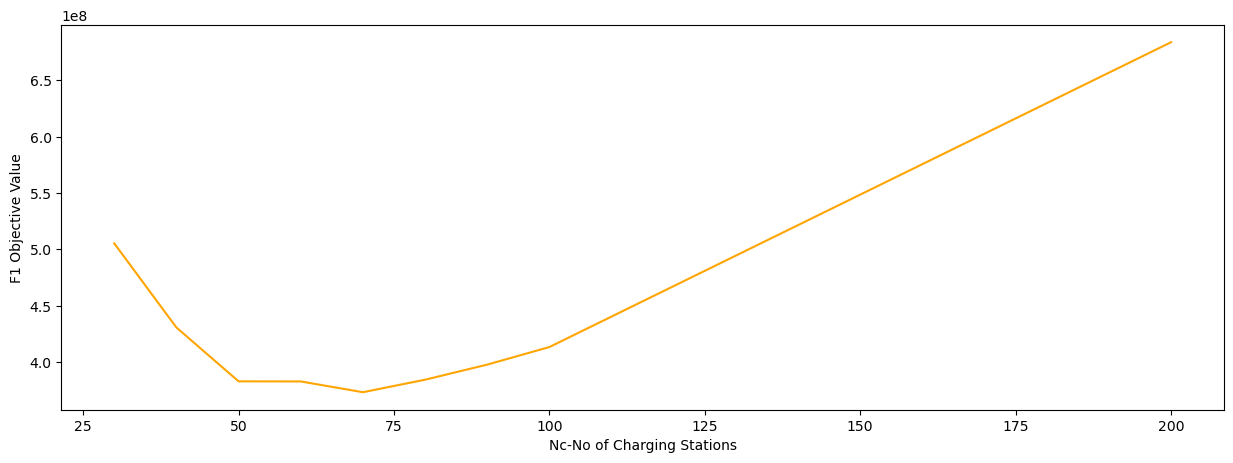

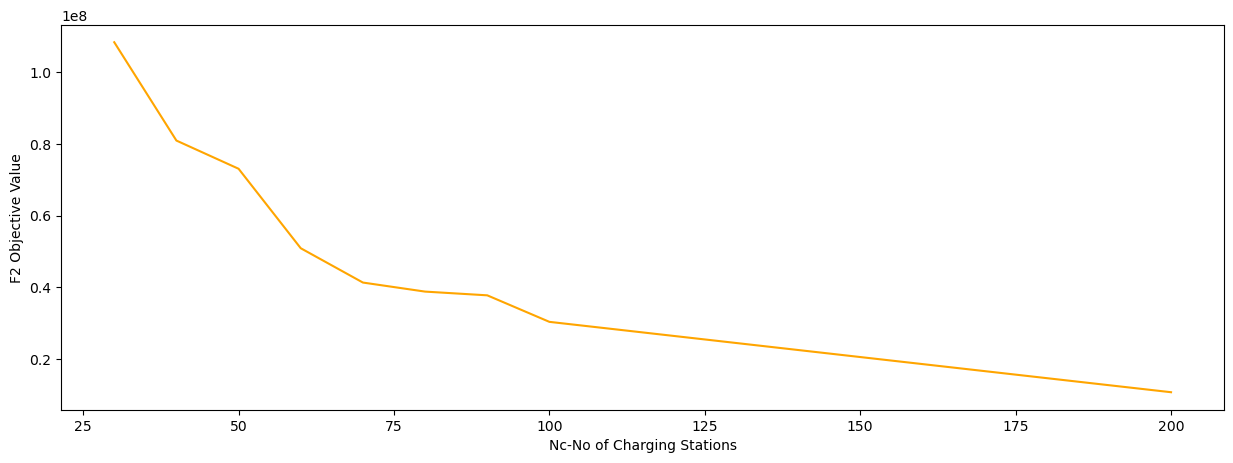

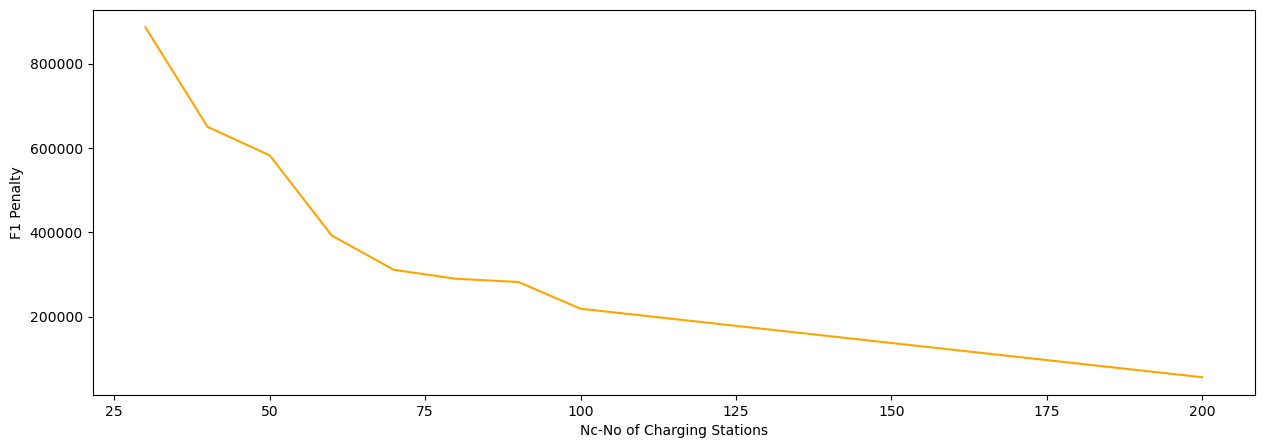

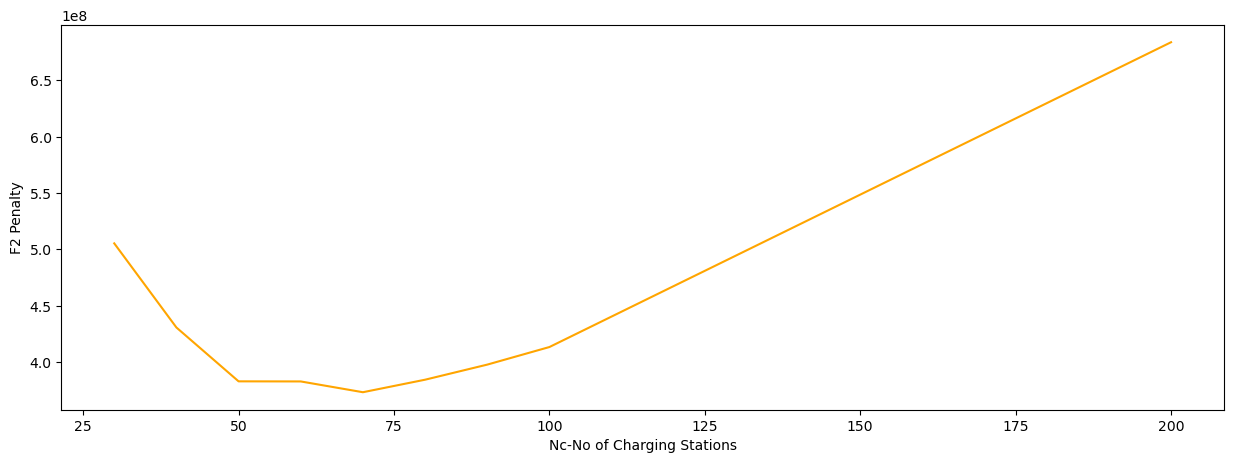

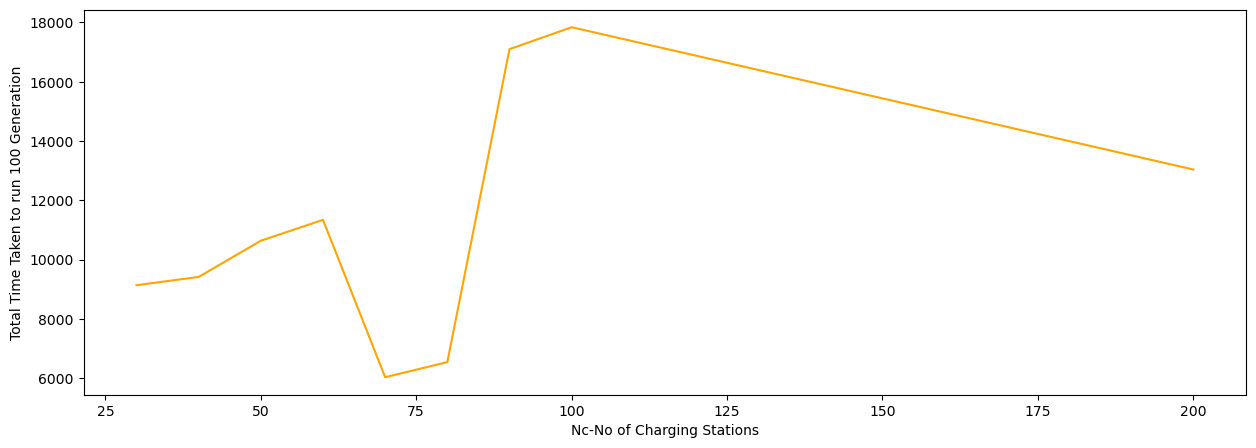

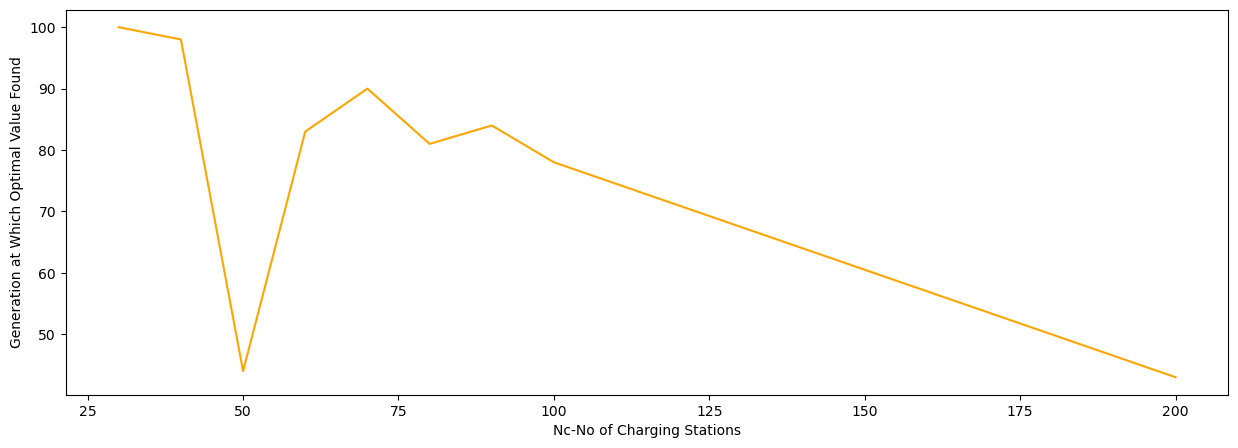

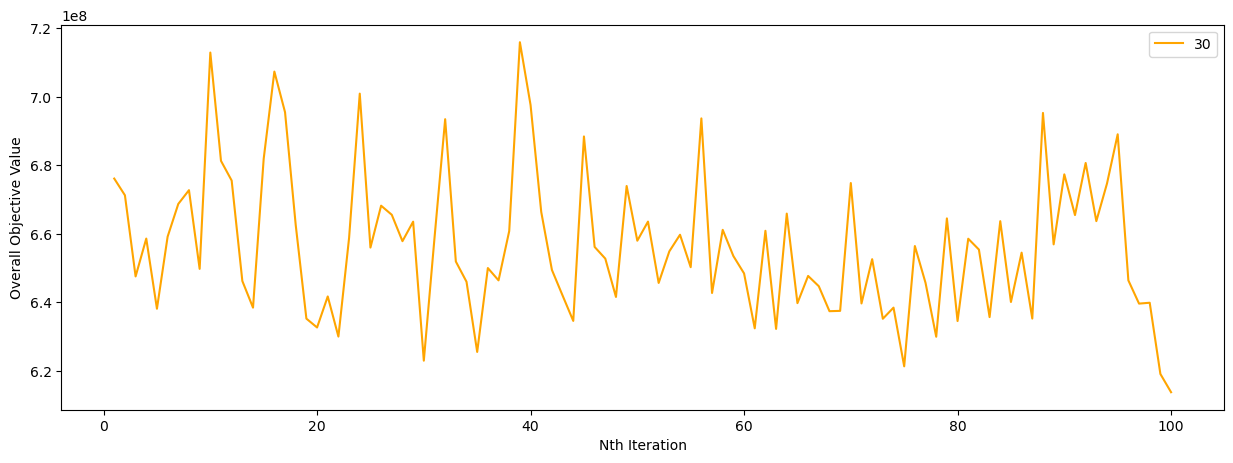

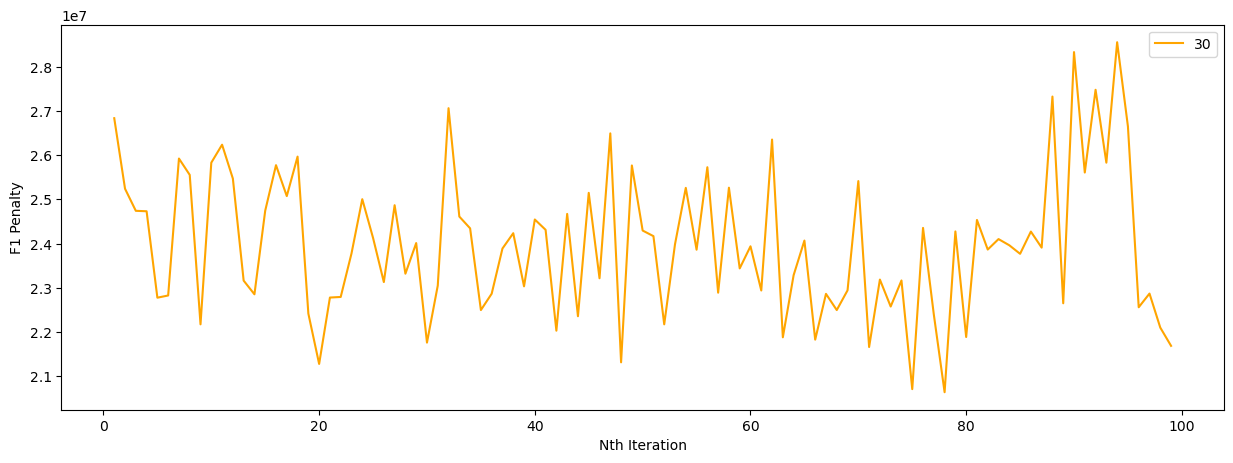

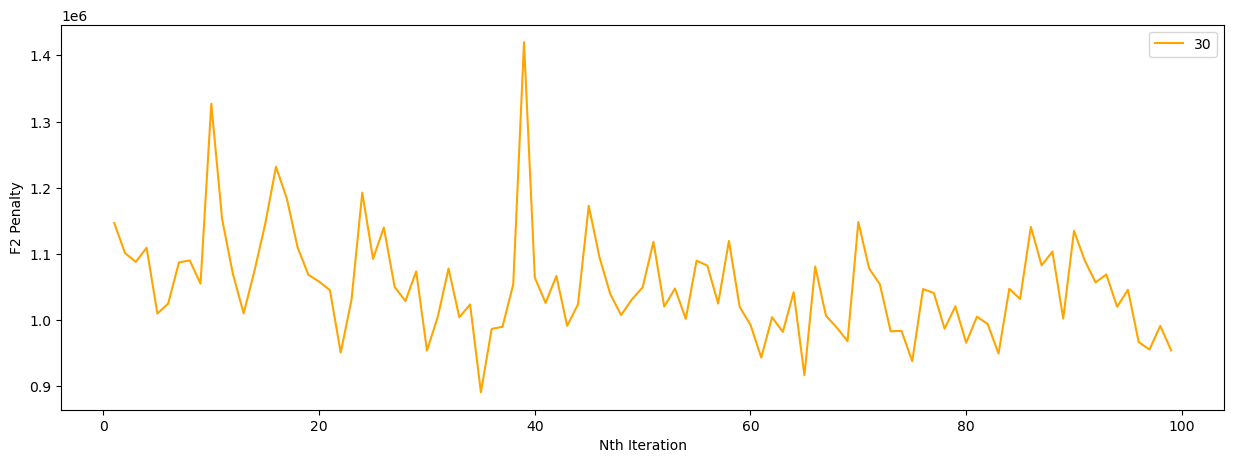

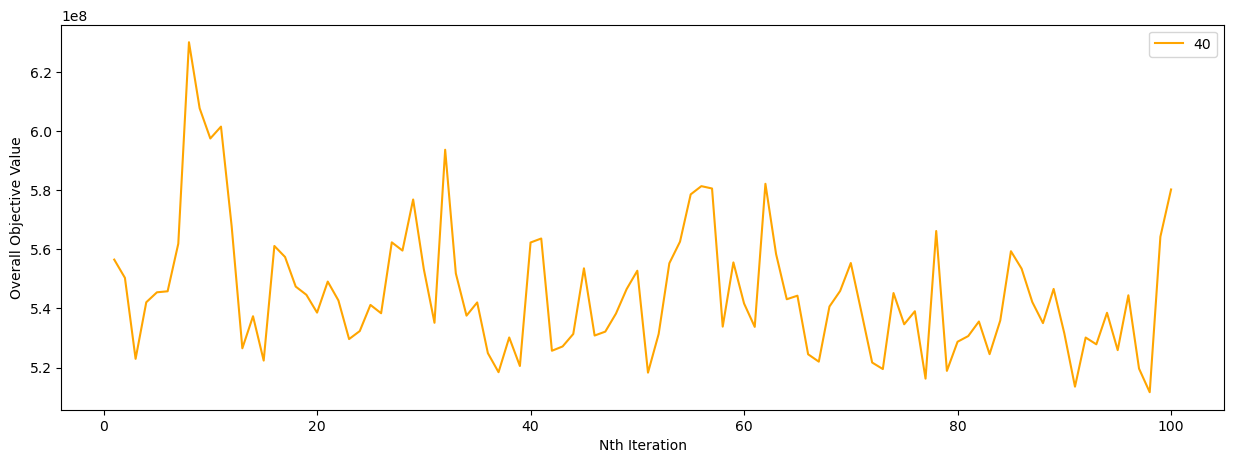

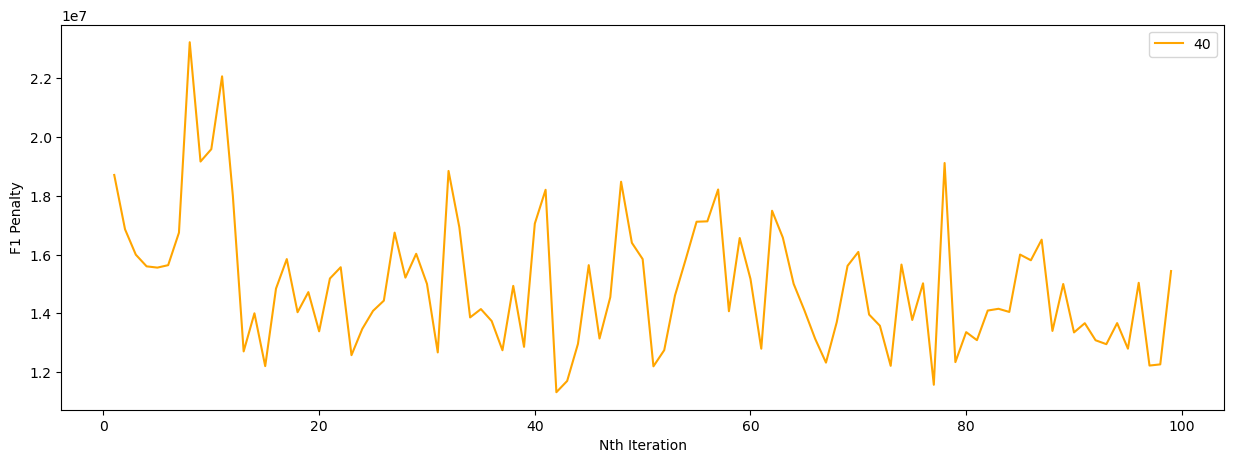

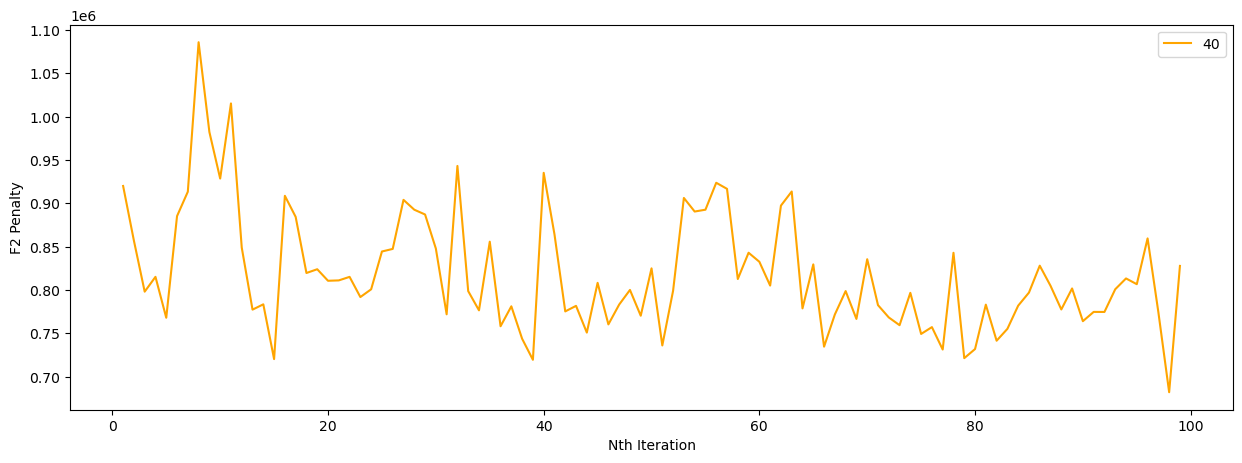

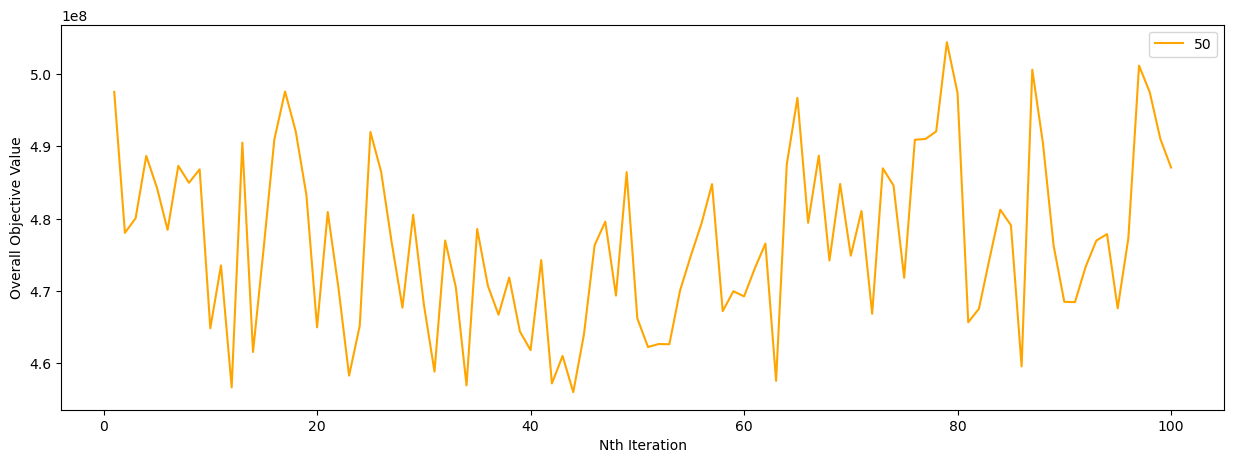

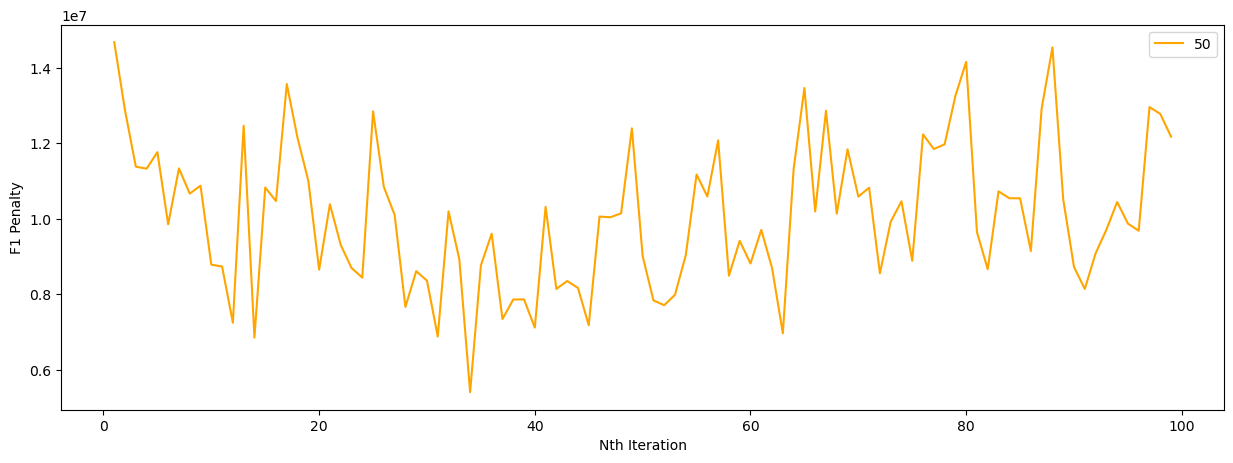

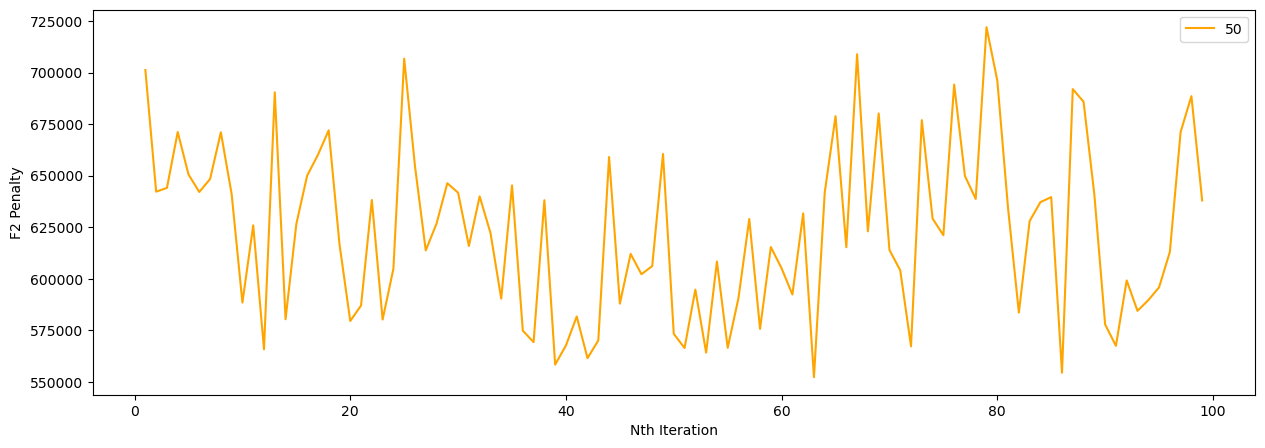

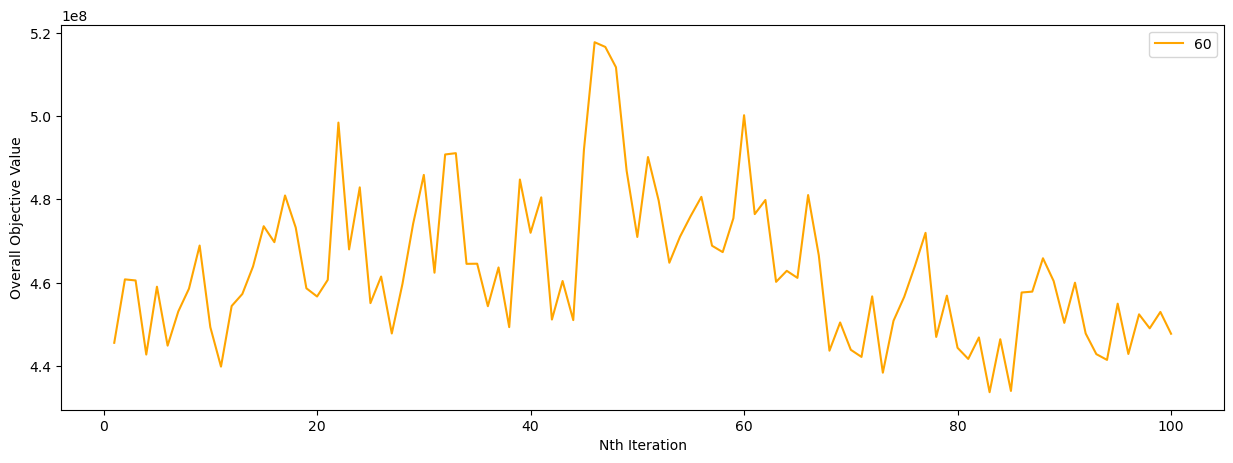

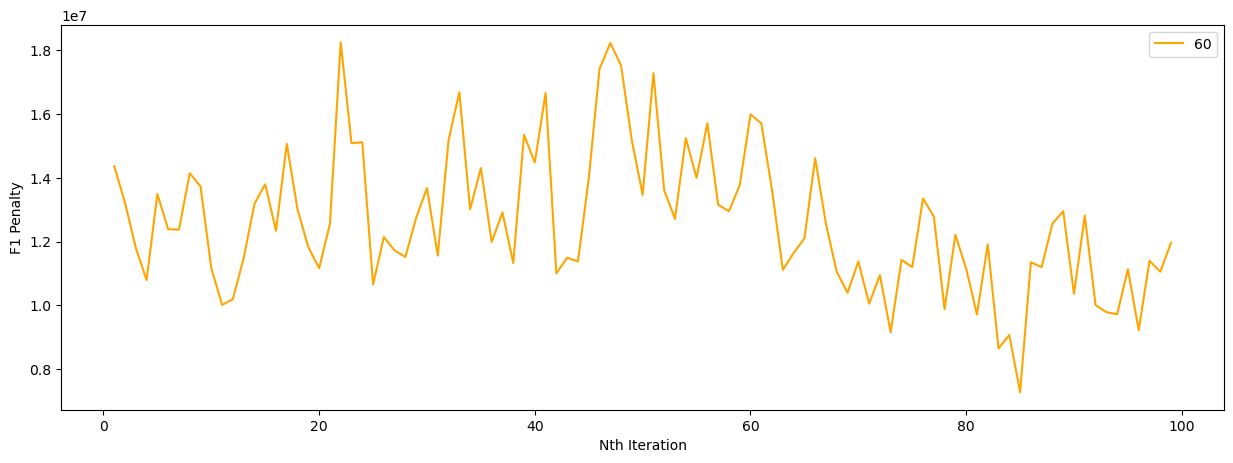

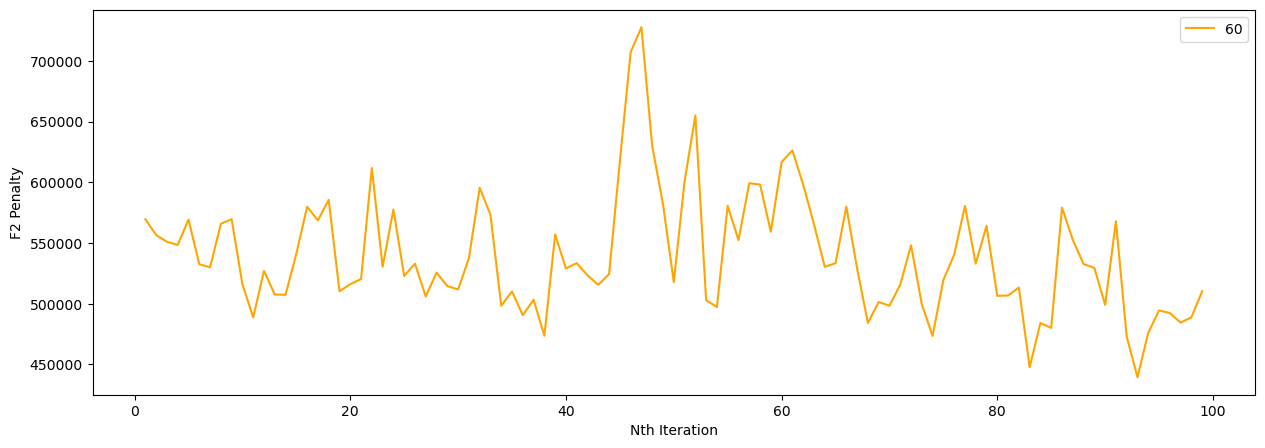

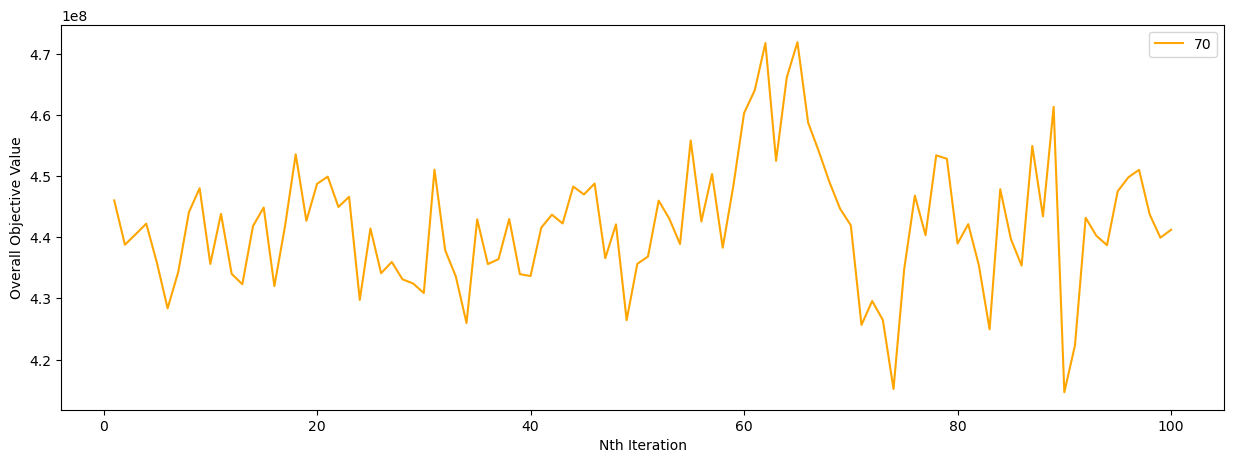

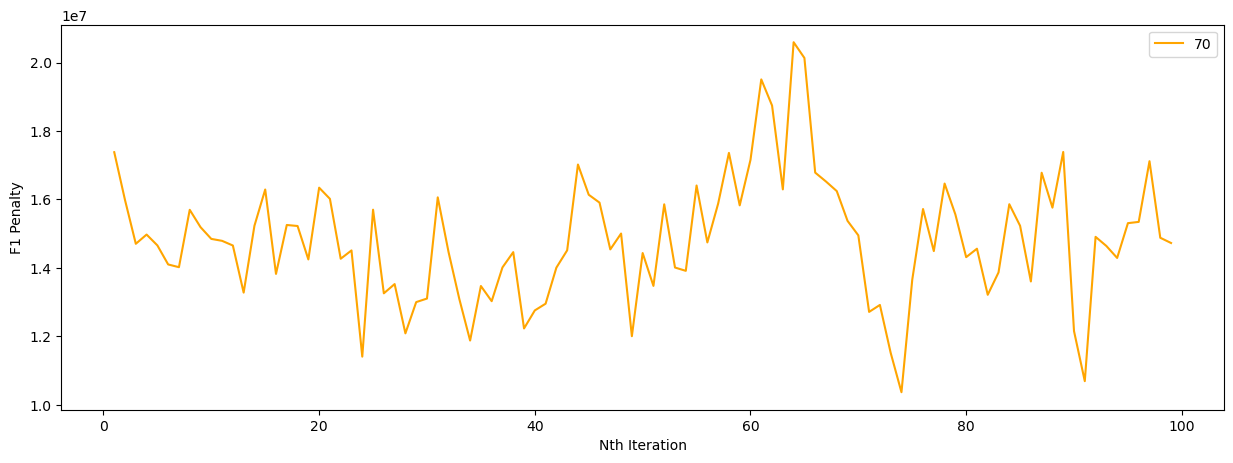

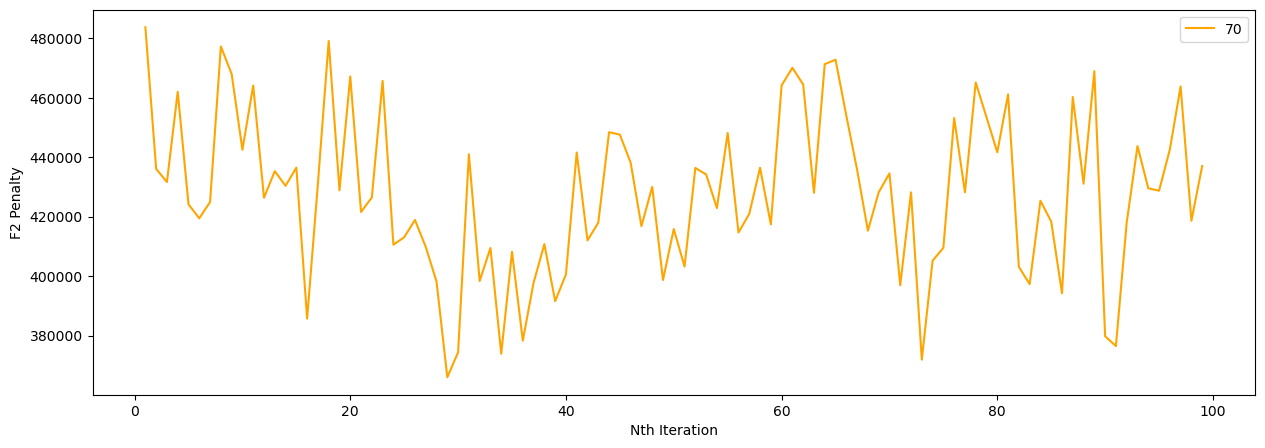

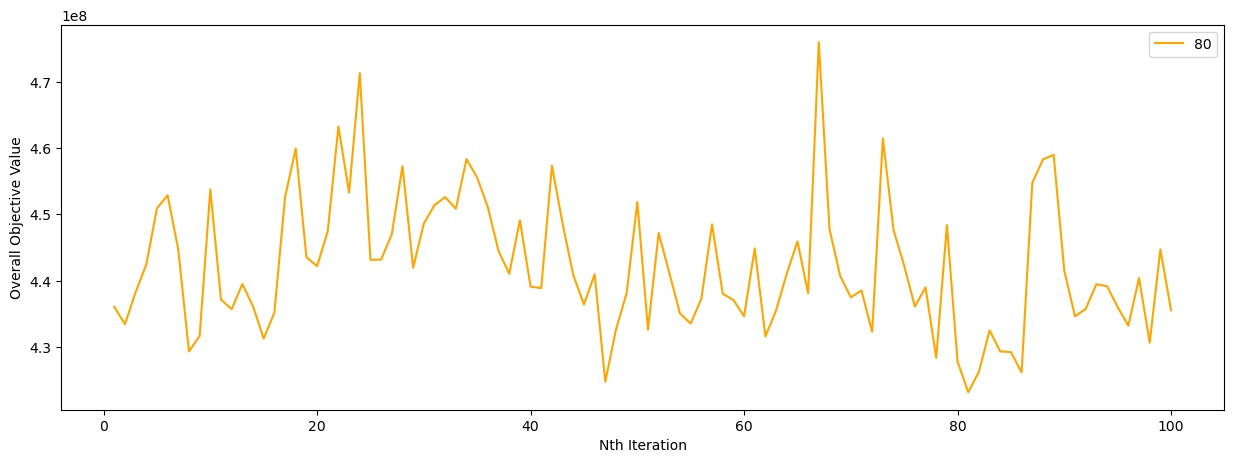

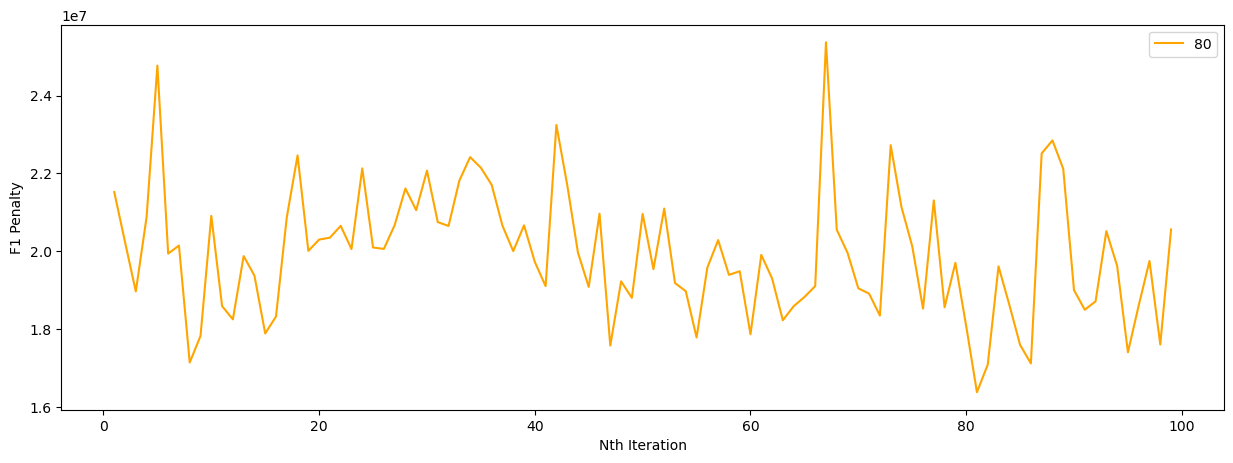

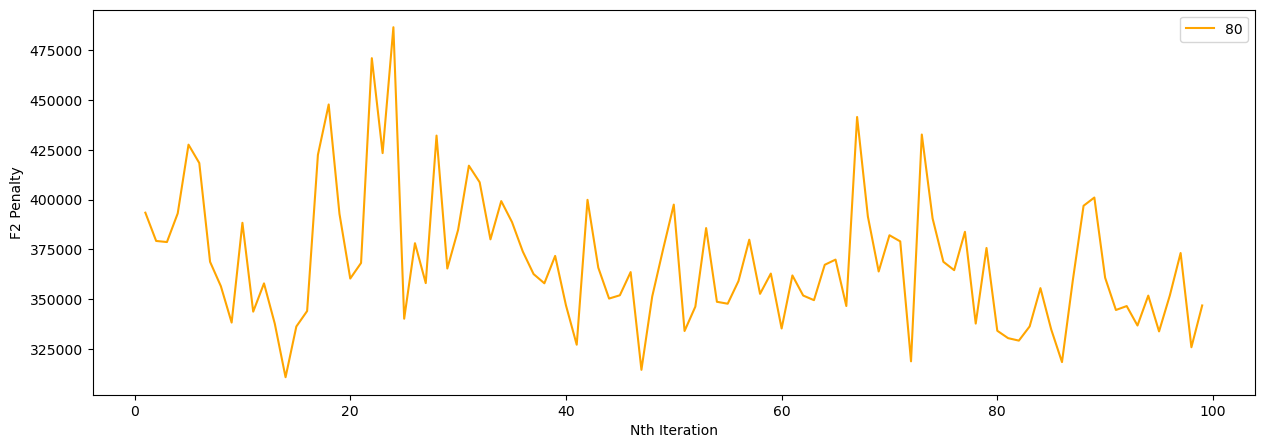

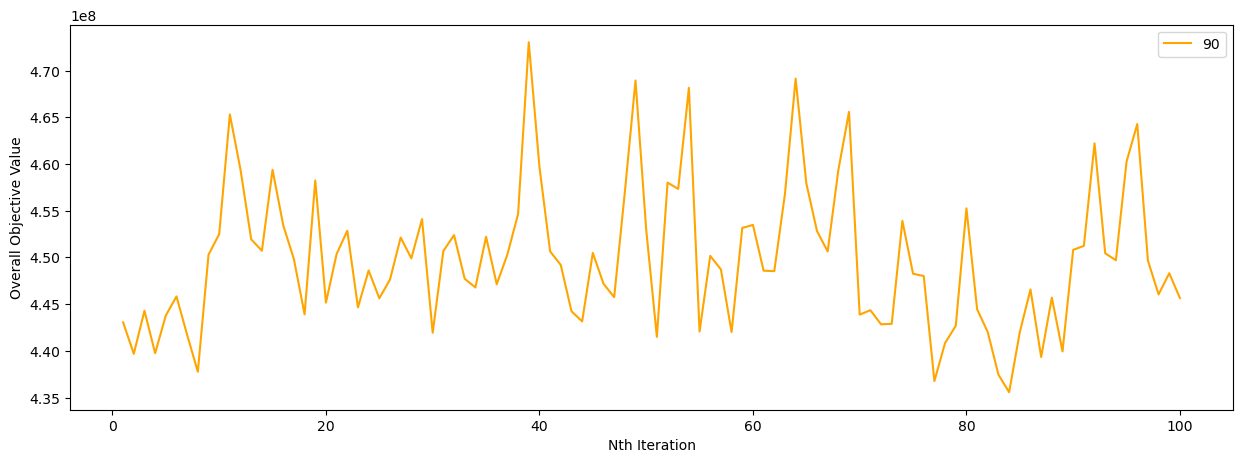

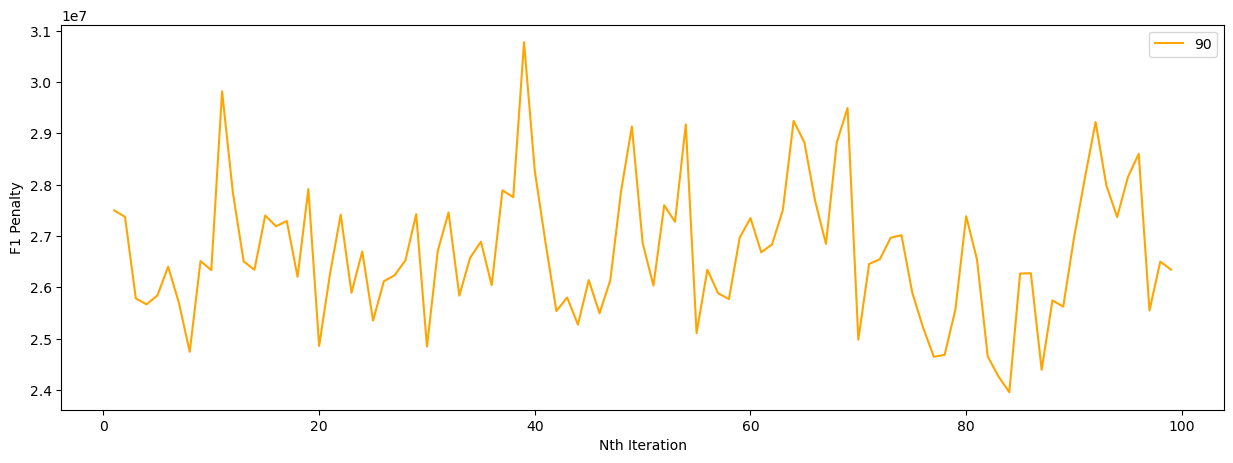

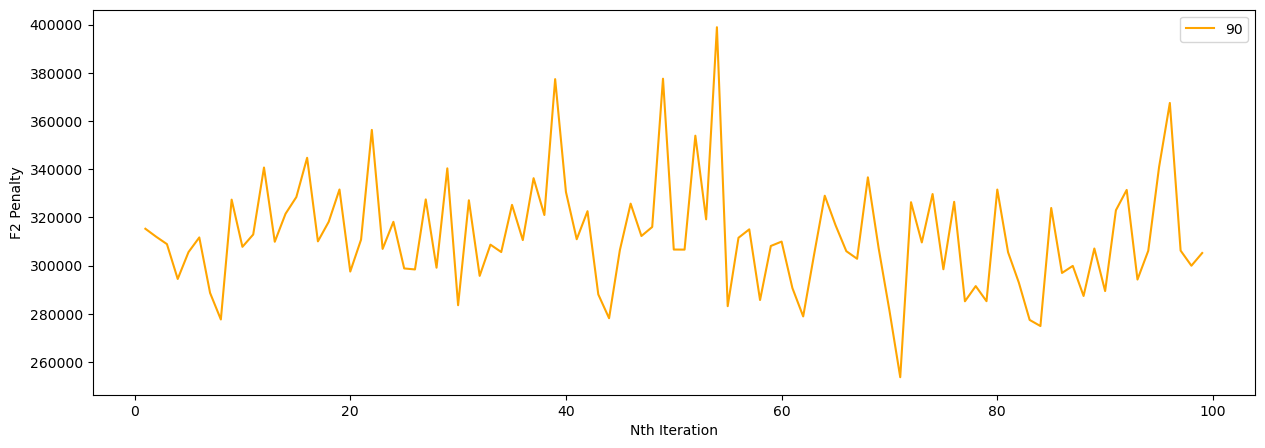

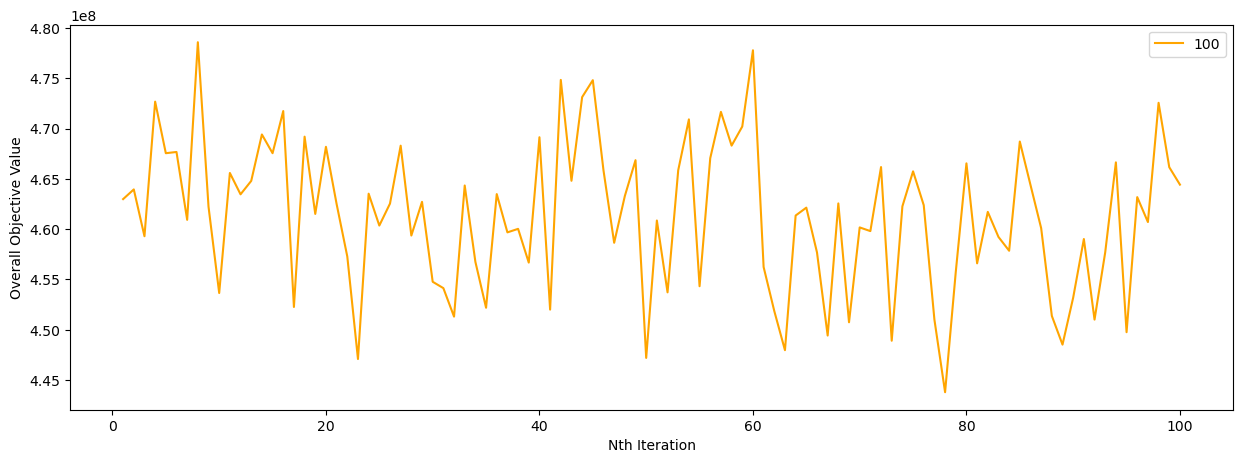

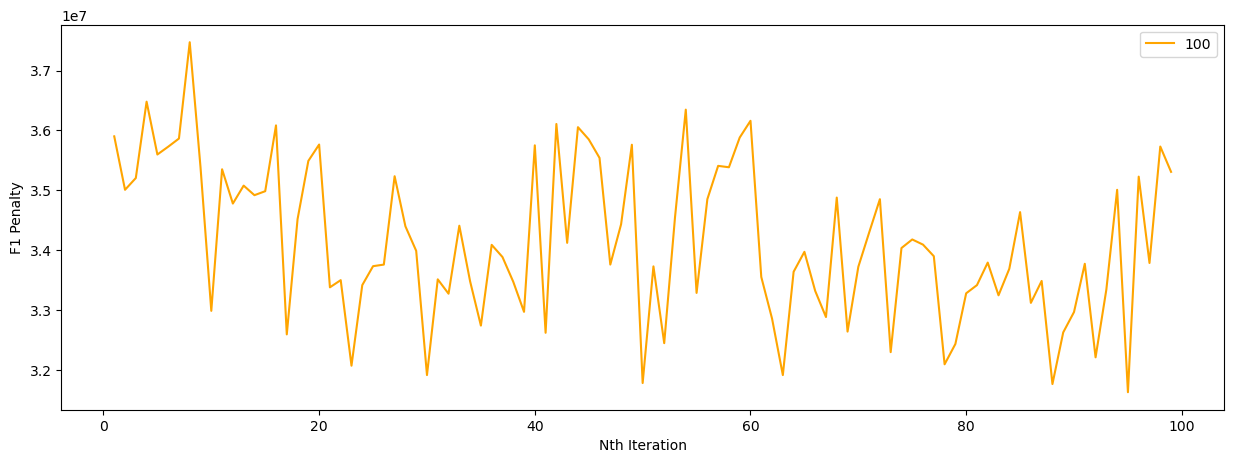

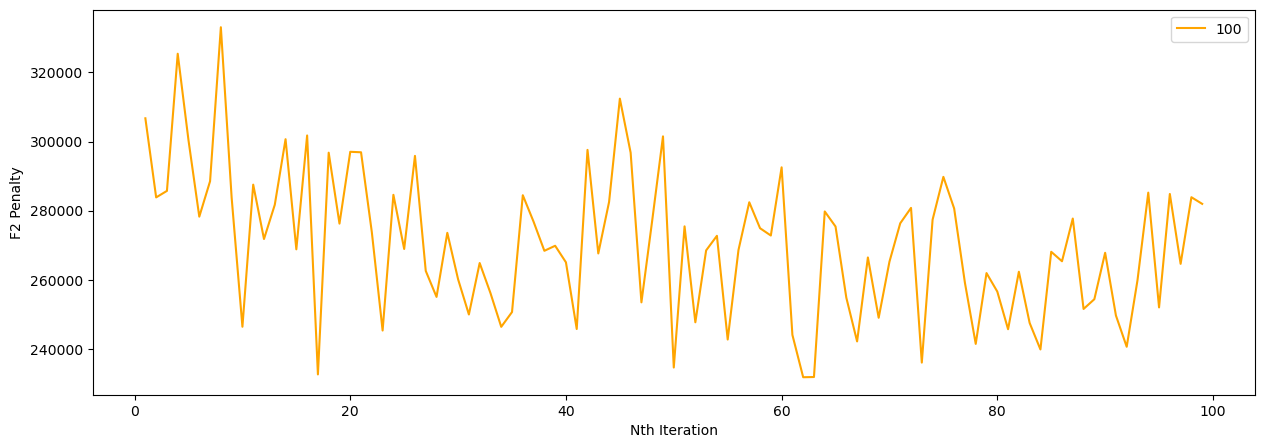

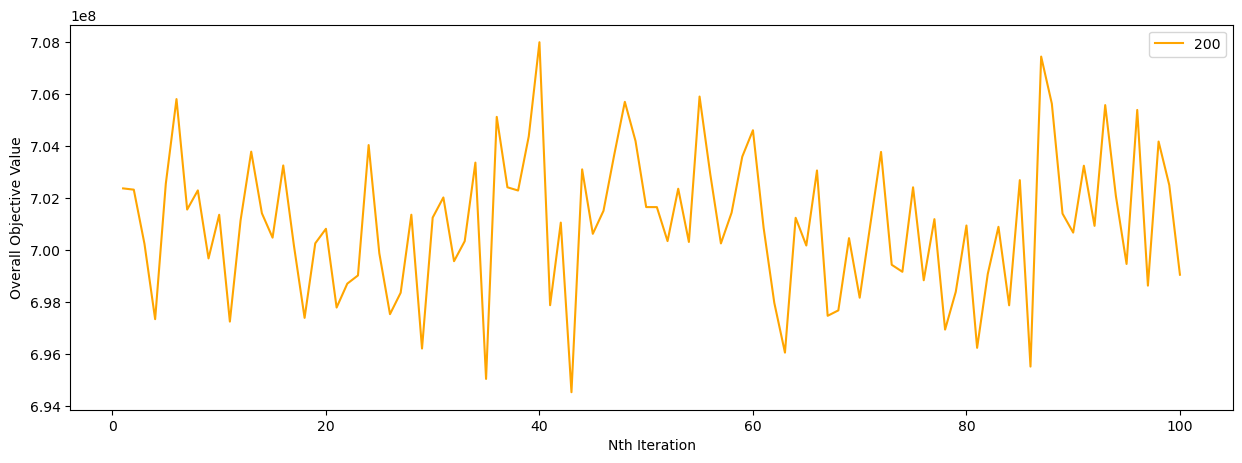

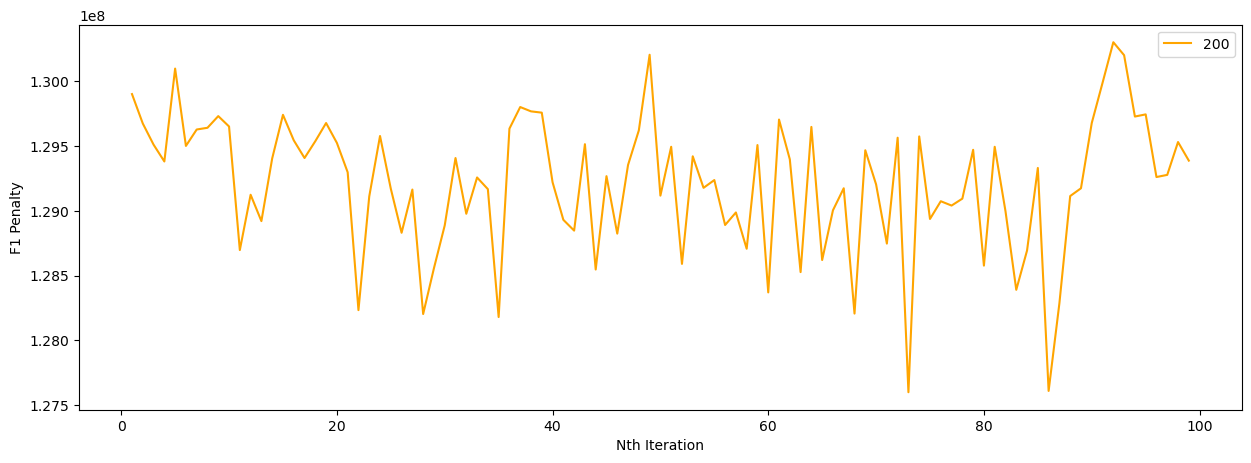

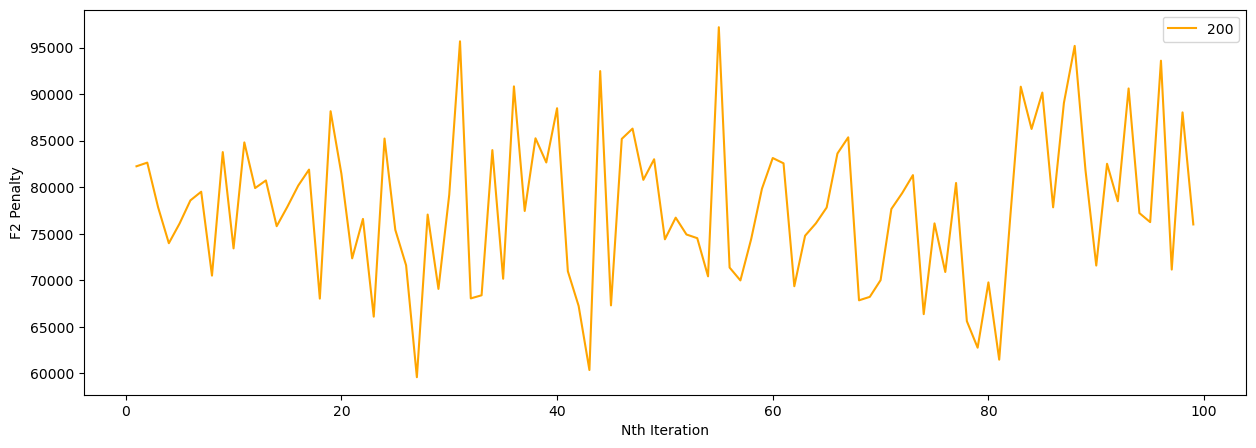

<Figure size 640x480 with 0 Axes>

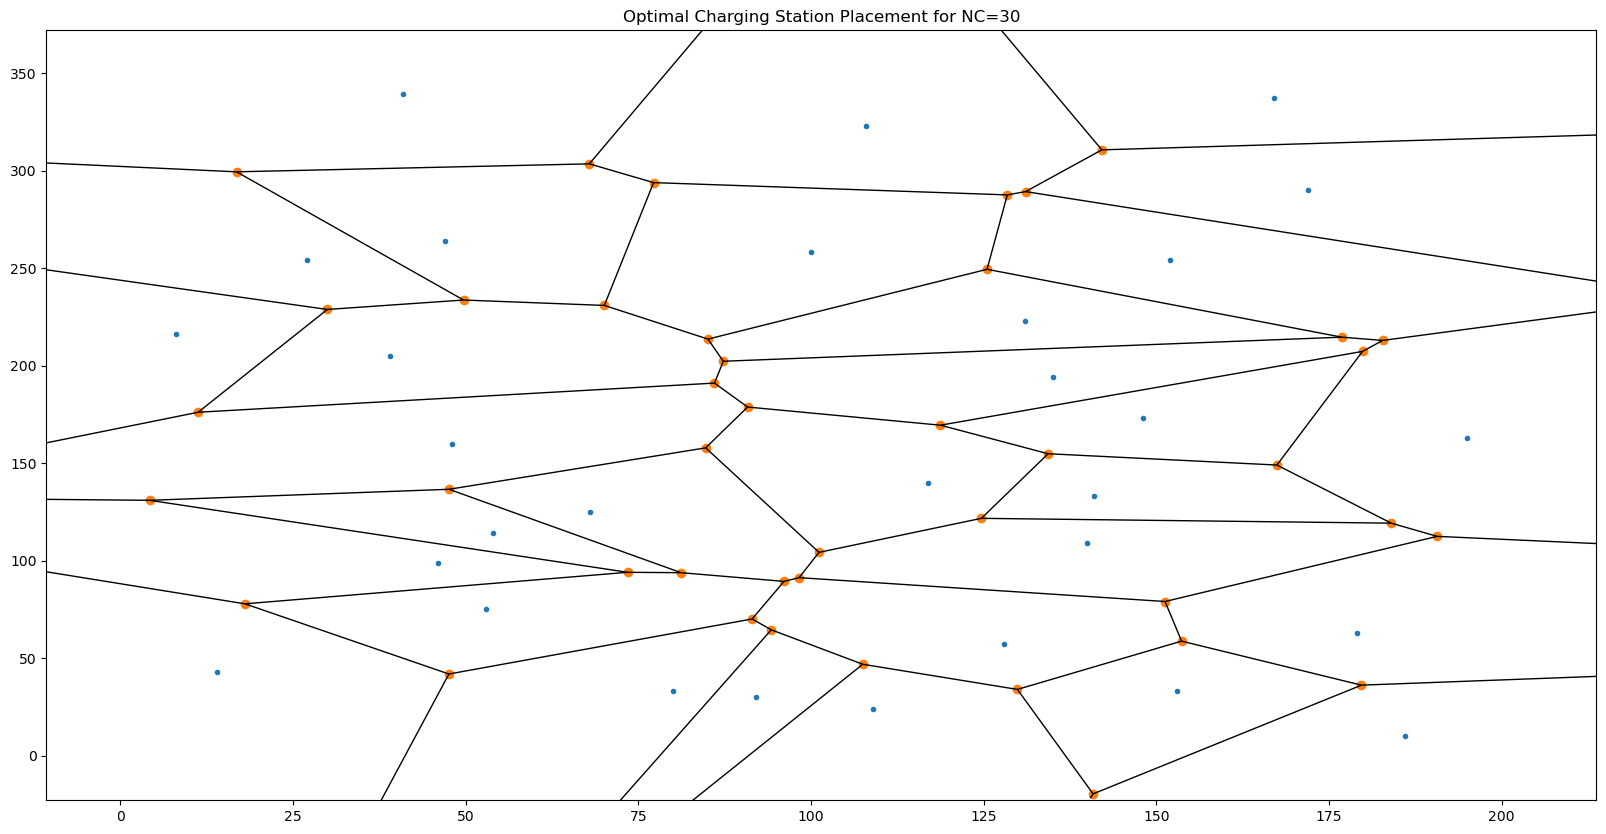

<Figure size 640x480 with 0 Axes>

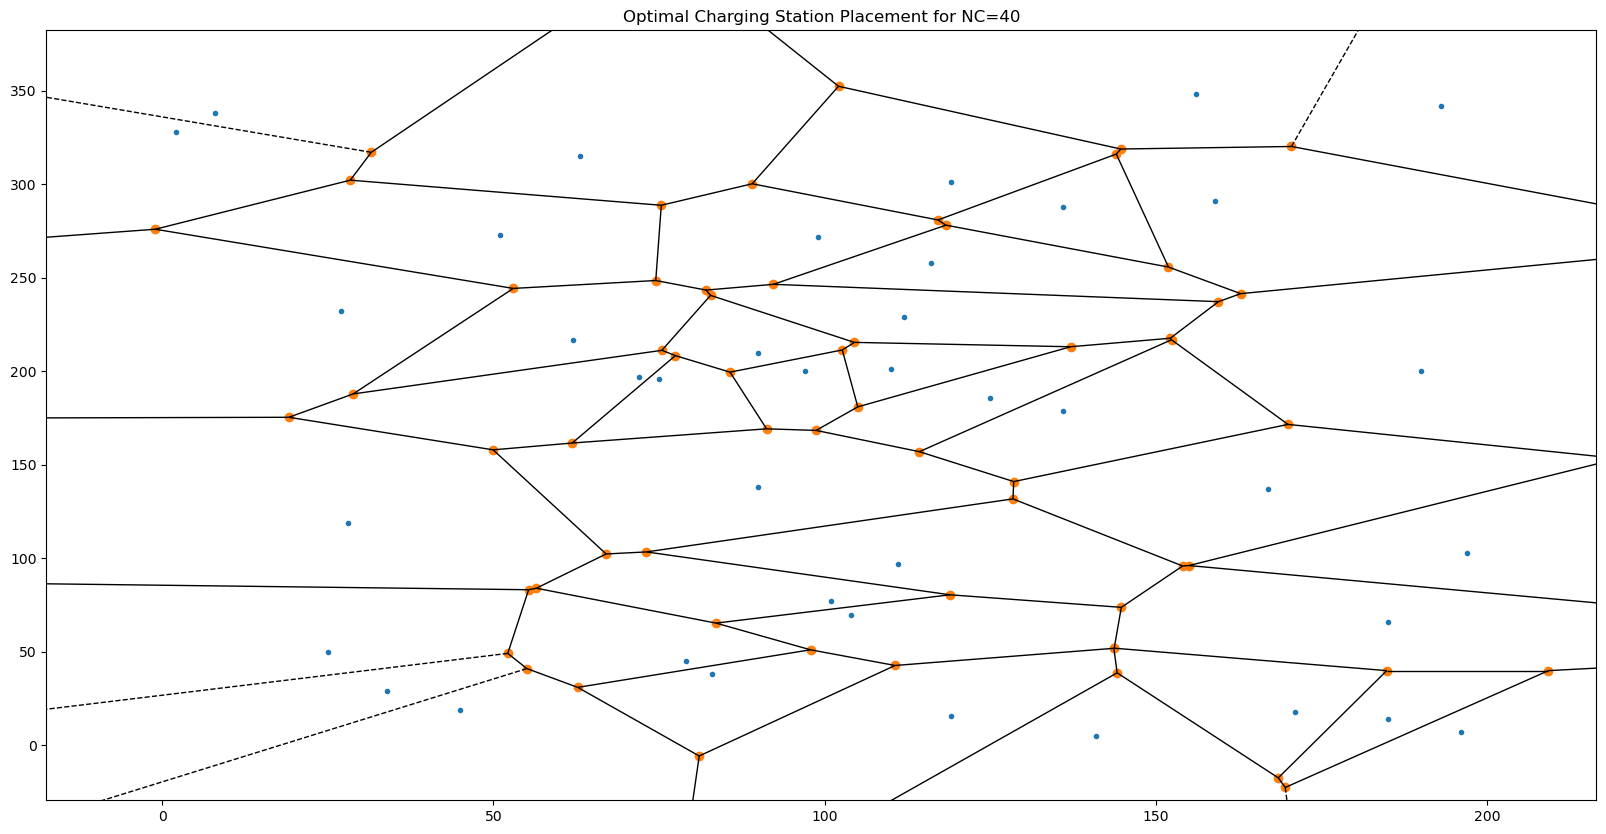

<Figure size 640x480 with 0 Axes>

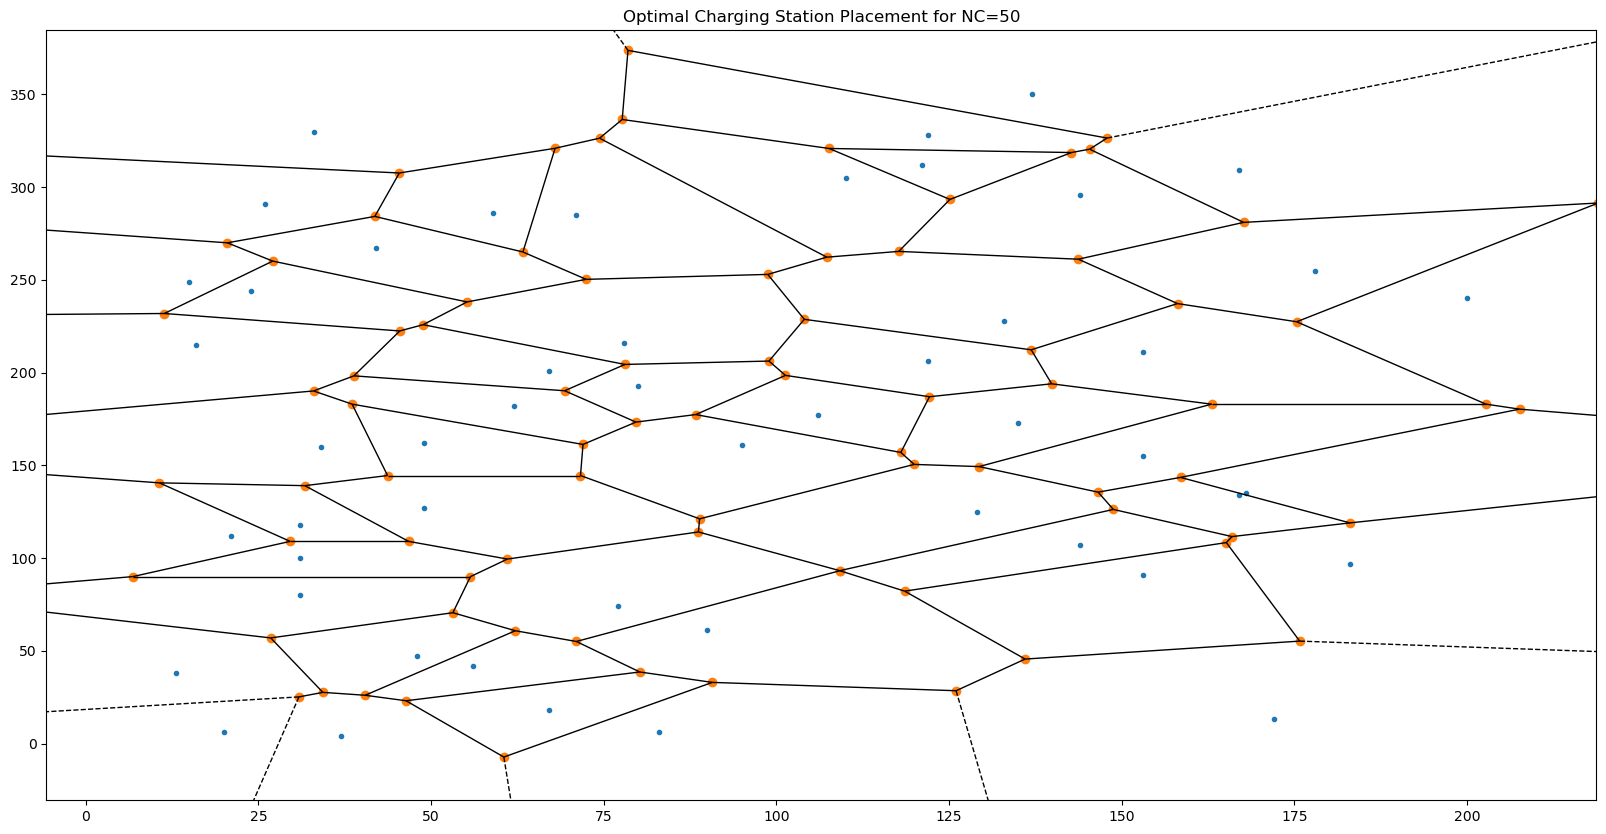

<Figure size 640x480 with 0 Axes>

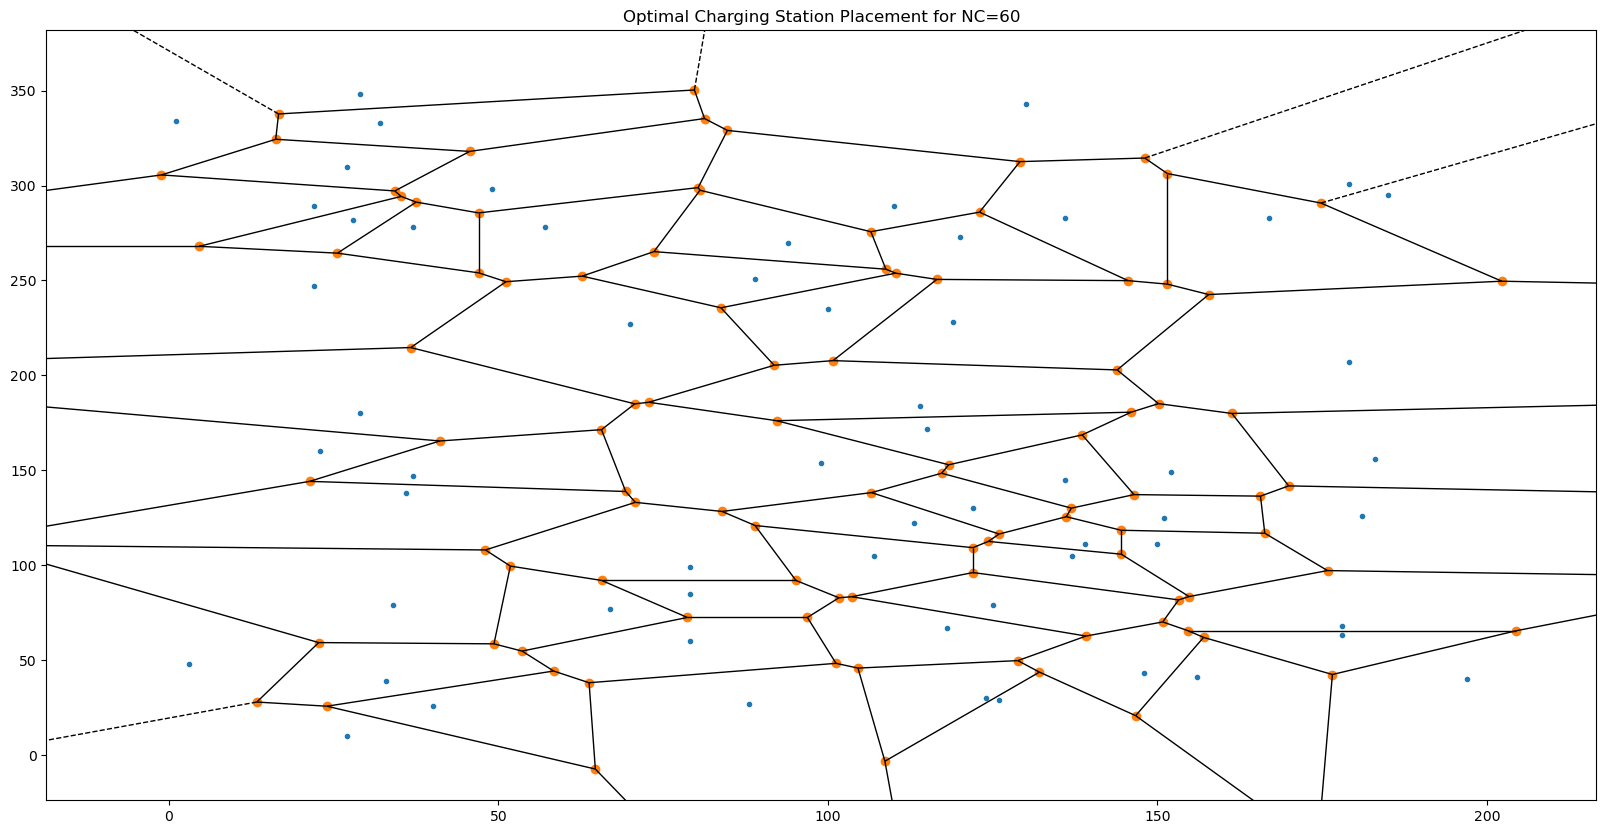

<Figure size 640x480 with 0 Axes>

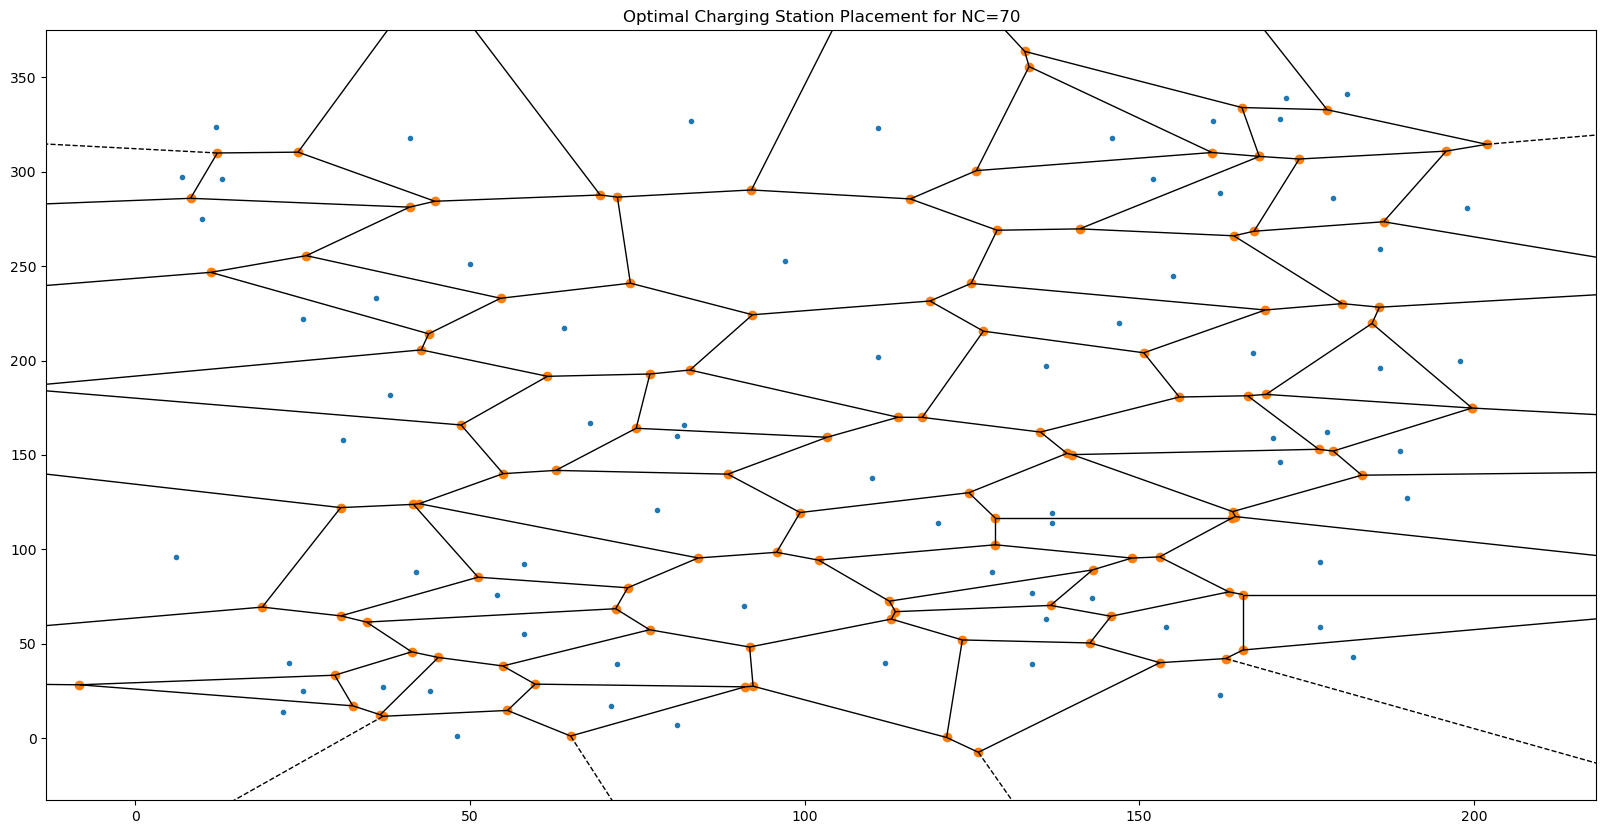

<Figure size 640x480 with 0 Axes>

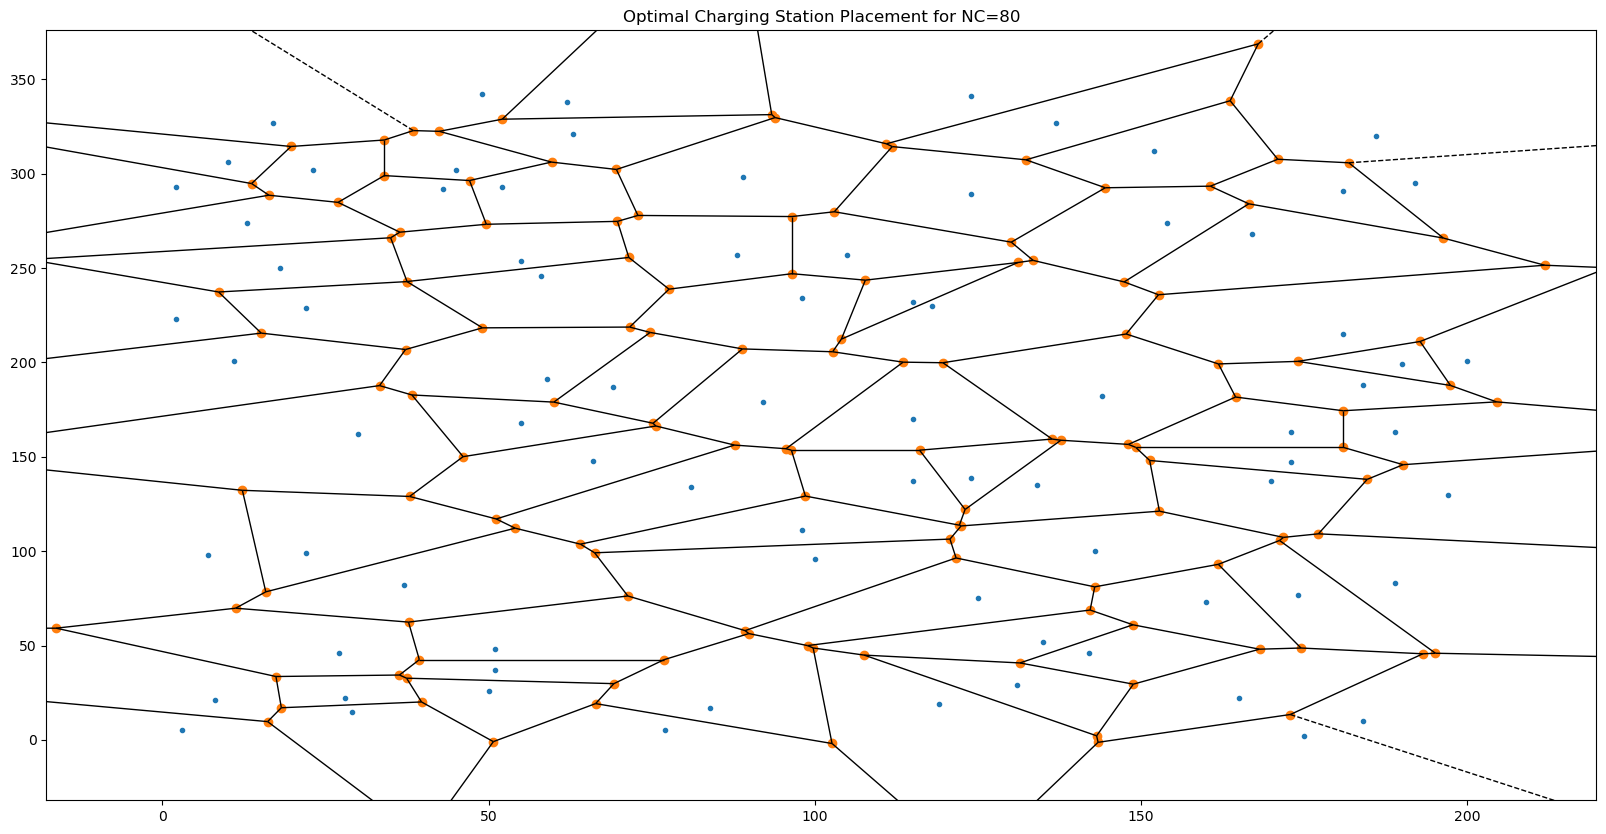

<Figure size 640x480 with 0 Axes>

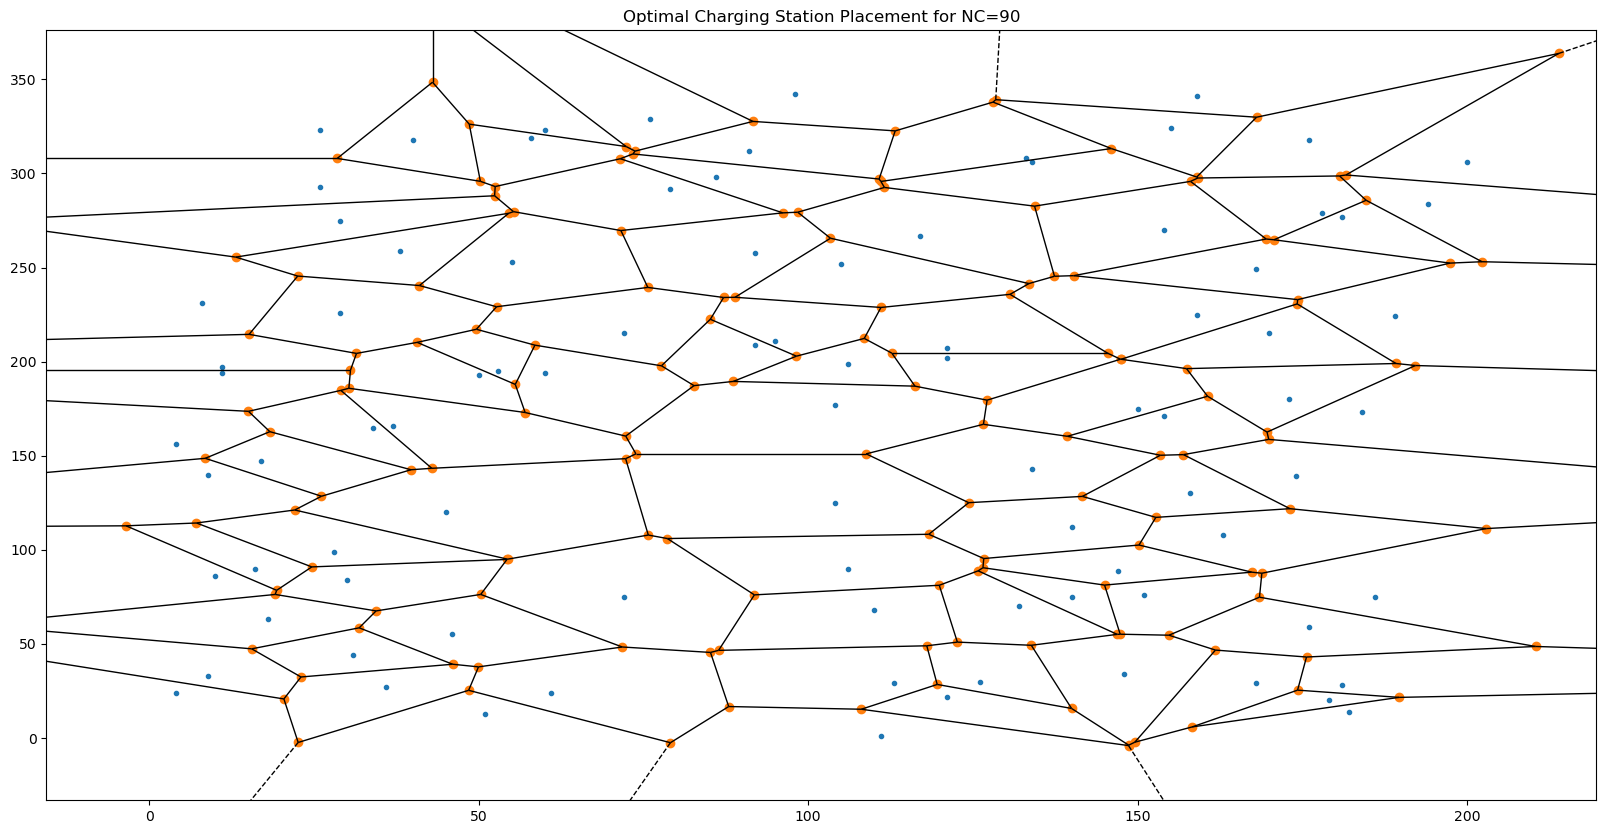

<Figure size 640x480 with 0 Axes>

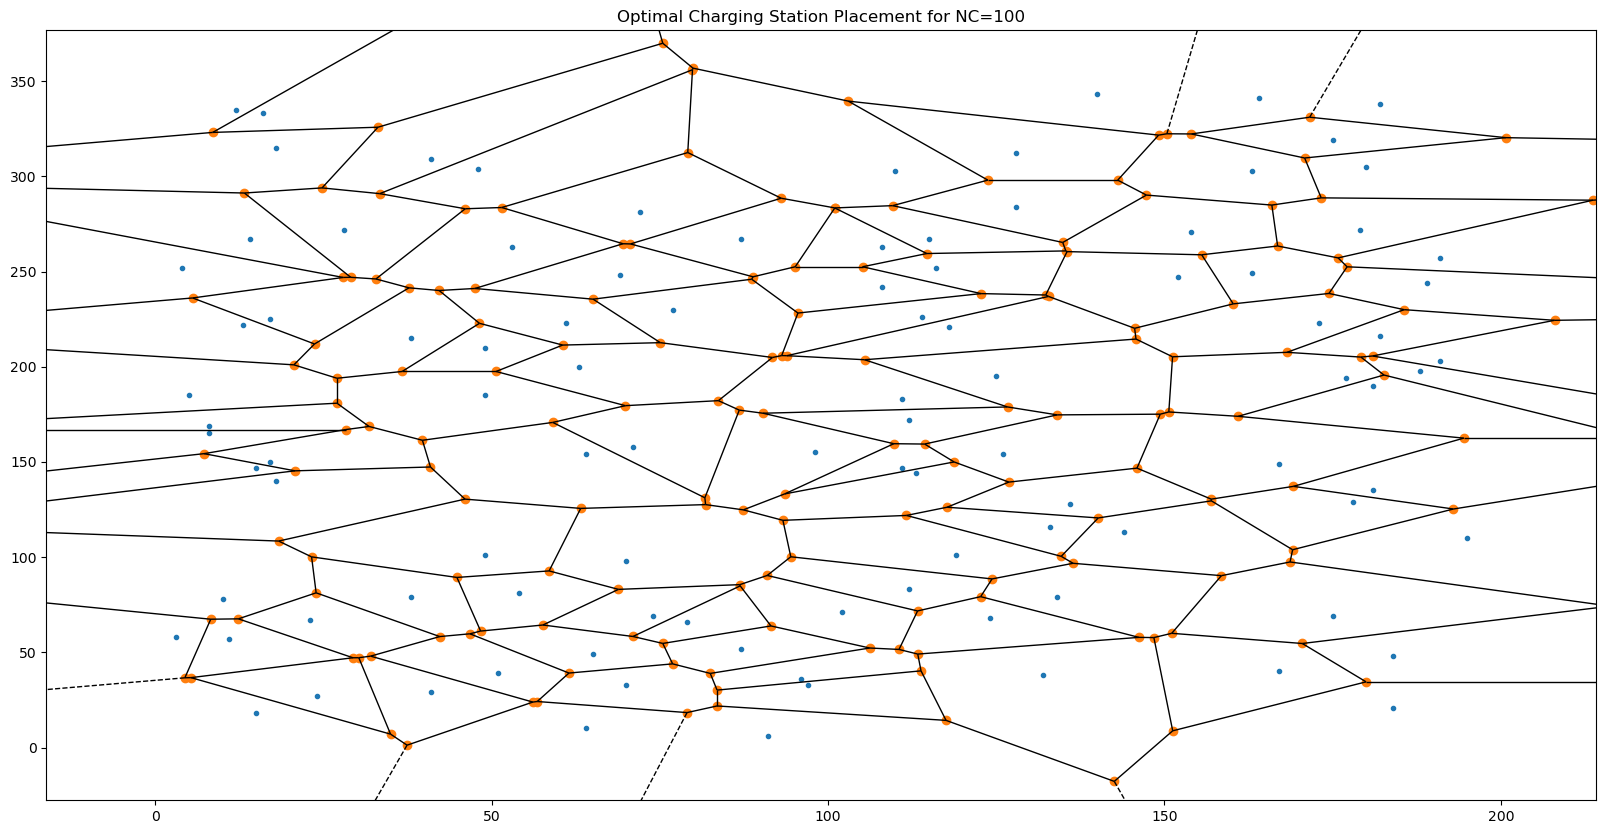

<Figure size 640x480 with 0 Axes>

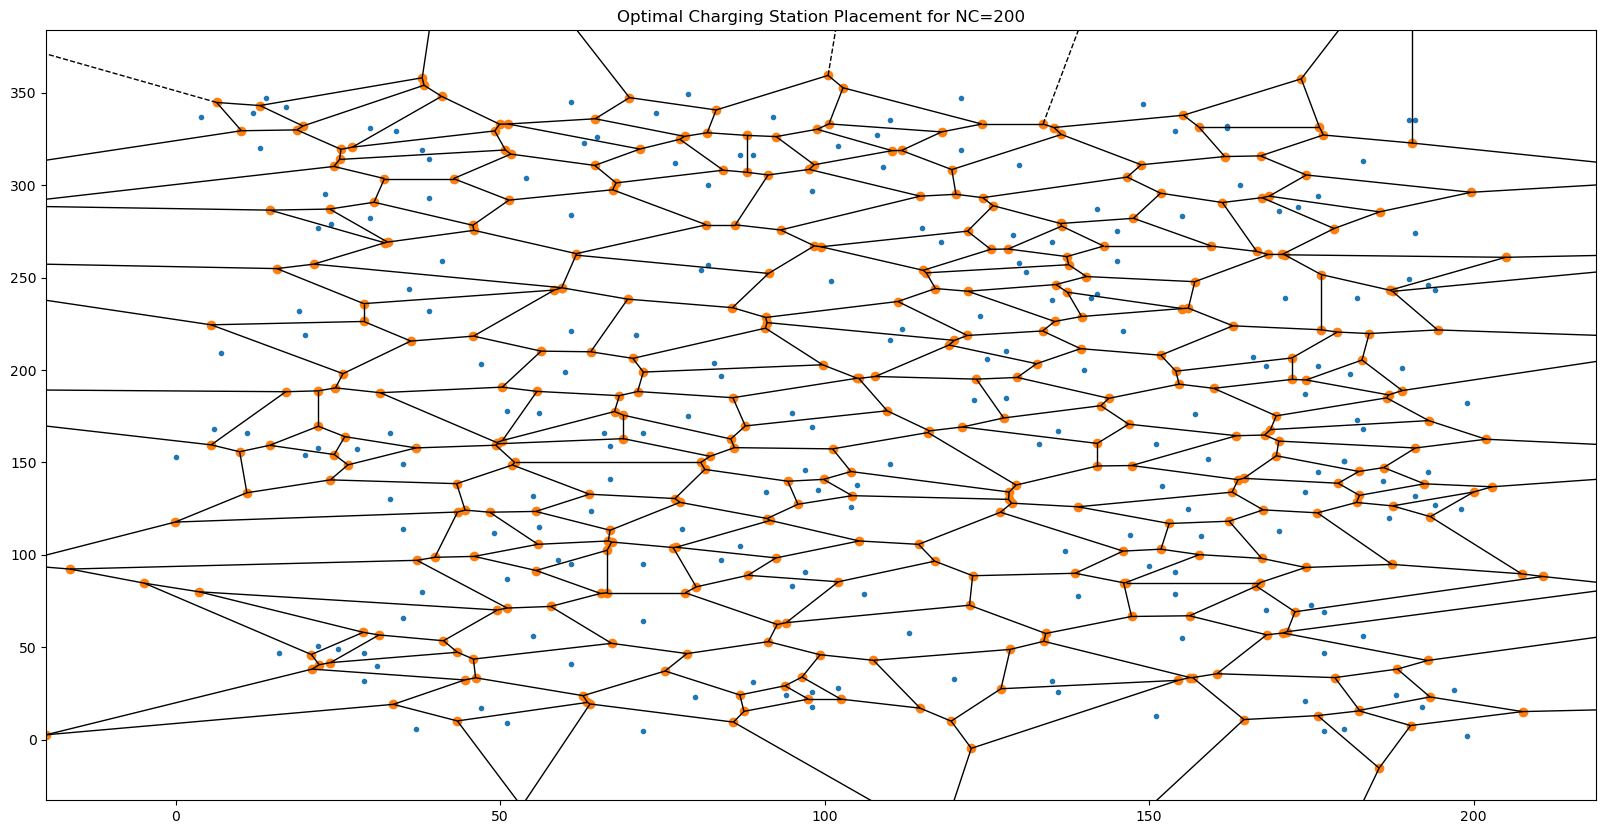

In [187]:
plotter(obj_progressor,"Nc-No of Charging Stations","Best Overall Objective Value","GA Best Overall Objective vs Nc")
plotter(F1_progressor,"Nc-No of Charging Stations","F1 Objective Value","GA F1 objective value vs Nc")
plotter(F2_progressor,"Nc-No of Charging Stations","F2 Objective Value","GA F2 objective value vs Nc")
plotter(F1_penalty_progressor,"Nc-No of Charging Stations","F1 Penalty","GA F1 penalty value vs Nc")
plotter(F2_penalty_progressor,"Nc-No of Charging Stations","F2 Penalty","GA F2 penalty value vs Nc")
plotter(time_progressor,"Nc-No of Charging Stations","Total Time Taken to run 100 Generation","GA F2 penalty value vs Nc")
plotter(gen_progressor,"Nc-No of Charging Stations","Generation at Which Optimal Value Found","GA F2 penalty value vs Nc")
for nc in [30,40,50,60,70,80,90,100,200]:
    score_dict=overall_GA_dict[nc]
    temp_d={}
    for keys,values in score_dict[0].items():
        temp_d[keys]=values[0]
    plotter(temp_d,"Nth Iteration","Overall Objective Value",str(nc)+" GA "+"Overall Objective Plot",nc)
    plotter(score_dict[3],"Nth Iteration","F1 Penalty",str(nc)+" GA "+"F1 Penalty Plot",nc)
    plotter(score_dict[4],"Nth Iteration","F2 Penalty",str(nc)+" GA "+"F2 Penalty Plot",nc)
for nc in [30,40,50,60,70,80,90,100,200]:
    voronoi_diagram_drawer(cs_coord[nc],nc)
    